# Prep

#### Q1

assume ideal gas $ P = \frac{Nk_{B}T}{V} = nk_{B}T $

so $ P \propto T $

#### Q2

The max/min points will shift because the work function of the metal changes.  
The current will stay the same in the same peaks (of course the current changes for the same V because of the shift).

#### Q3

The current will be proportional to the square root of the voltage.  
$ I\propto\sqrt{V} $

#### Q4

Assuming all electrons collide (which isn't the case in reality) then $I=0$

#### Q5

It's both the kathode tempreture and the voltage difference.

#### Q6

# Experiment

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from uncertainties import ufloat
from uncertainties import unumpy as unp
from scipy.stats import linregress
from scipy.constants import hbar, electron_volt, c


In [79]:
def find_max(I, smooth=5, m=2):
    sI = np.array(I,dtype=float)
    k = smooth
    for n in np.arange(0,len(I)):
        sI[n] = np.mean(I[(n-k if n-k > 0 else 0):n+k+1])
    
    maxs = []
    for n in np.arange(0,len(I)):
        if np.argmax(sI[(n-m if n-m > 0 else 0):n+m+1]) == m:
            maxs = maxs + [n]

    return np.array(maxs), sI


In [99]:
def exc_level(Va, maxs):
    
    va_maxs = Va[maxs]
    n = np.arange(len(va_maxs))+1
    reg = linregress(n, va_maxs)

    return ufloat(reg.slope, reg.stderr), ufloat(reg.intercept, reg.intercept_stderr)


In [182]:
Heater_Current = 0.26 #A 
fh1 = pd.read_csv('data/FH1_260.csv',sep='\t',header=5) # read the data. 
Va1 = np.array(fh1['Va(V)_1']) # accelerating voltage array 
I1 = np.array(fh1['Ia(E-12 A)_1']) # Current array 
T1 = np.array(fh1['T(c)_1']) #temperature array 

In [183]:
maxs = find_max(I1,smooth=0,m=20)[0]

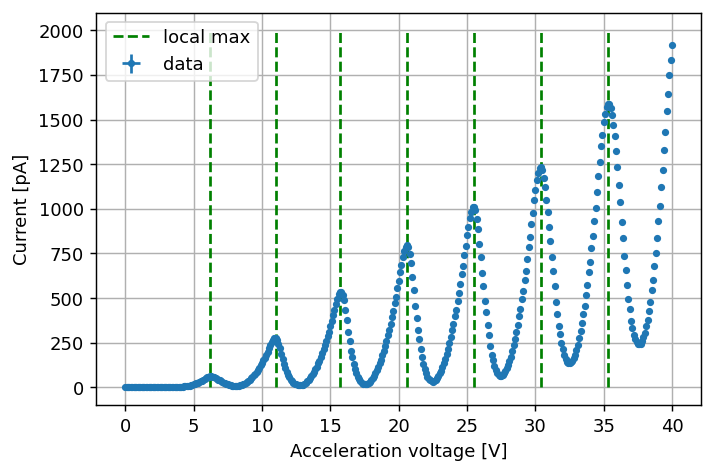

In [196]:
plt.figure(dpi=130) 
plt.errorbar(Va1, I1, xerr=0.1, yerr=0.01, fmt='.', label='data'.format(Heater_Current)) 
plt.vlines(Va1[maxs[:-1]], ymin=0, ymax=2000, colors='green', linestyles='dashed', label='local max')
plt.ylabel('Current [pA]') 
plt.xlabel('Acceleration voltage [V]') 
plt.legend()
plt.grid() 

In [100]:
hg_level, delta = exc_level(Va1, maxs)

In [102]:
hg_level, delta

(4.846428571428571+/-0.012314381467635832,
 1.278571428571432+/-0.062184578222631265)

In [105]:
runs = [
    {'H_current': 260, 'data_path': 'FH1_260.csv', 'data': None},
    {'H_current': 250, 'data_path': 'FH1_250ma_6600mv.csv', 'data': None},
    {'H_current': 240, 'data_path': 'FH1_240ma_6200mv.csv', 'data': None},
    {'H_current': 230, 'data_path': 'FH1_230.csv', 'data': None}
]

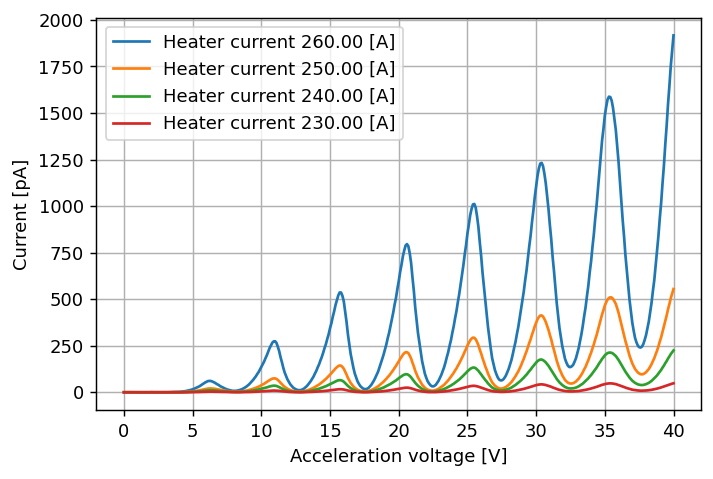

In [110]:
plt.figure(dpi=130)
for run in runs:
    data_path = run['data_path']
    run['data'] = pd.read_csv(f'data/{data_path}',sep='\t',header=5) # read the data. 
    fh1 = run['data'] 
    Va1 = np.array(fh1['Va(V)_1']) # accelerating voltage array 
    I1 = np.array(fh1['Ia(E-12 A)_1']) # Current array 
    T1 = np.array(fh1['T(c)_1']) #temperature array 
    plt.plot(Va1, I1, label='Heater current {:.2f} [A]'.format(run['H_current'])) 
plt.ylabel('Current [pA]') 
plt.xlabel('Acceleration voltage [V]') 
plt.legend()
plt.grid() 
plt.savefig('plots/heater_current.png')
plt.show()

In [115]:
runs = [
    {'H_current': 240, 'Vr': 0.9, 'data_path': 'FH_Vr09_240ma_6200mv.csv', 'data': None},
    {'H_current': 240, 'Vr': 1.5, 'data_path': 'FH1_240ma_6200mv.csv', 'data': None},
    {'H_current': 240, 'Vr': 3, 'data_path': 'FH_Vr3_240ma_6200mv.csv', 'data': None},
    {'H_current': 240, 'Vr': 5, 'data_path': 'FH_Vr5_240ma_6200mv.csv', 'data': None}
]

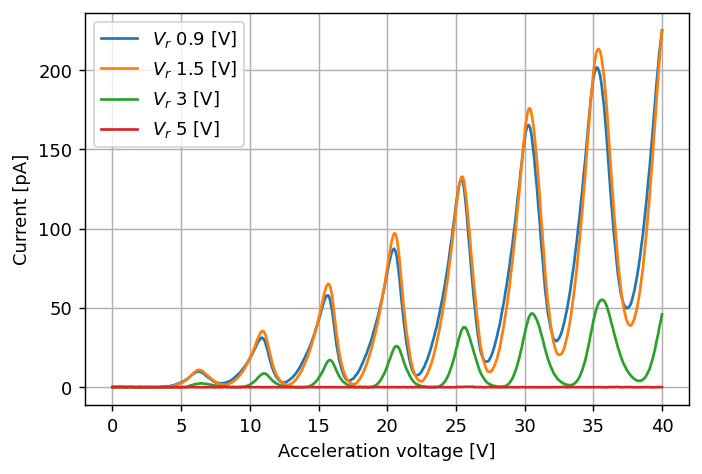

In [116]:
plt.figure(dpi=130)
for run in runs:
    data_path = run['data_path']
    run['data'] = pd.read_csv(f'data/{data_path}',sep='\t',header=5) # read the data. 
    fh1 = run['data'] 
    Va1 = np.array(fh1['Va(V)_1']) # accelerating voltage array 
    I1 = np.array(fh1['Ia(E-12 A)_1']) # Current array 
    T1 = np.array(fh1['T(c)_1']) #temperature array 
    plt.plot(Va1, I1, label=f'$V_{{r}}$ {run["Vr"]} [V]') 
plt.ylabel('Current [pA]') 
plt.xlabel('Acceleration voltage [V]') 
plt.legend()
plt.grid() 
plt.savefig('plots/vr.png')
plt.show()

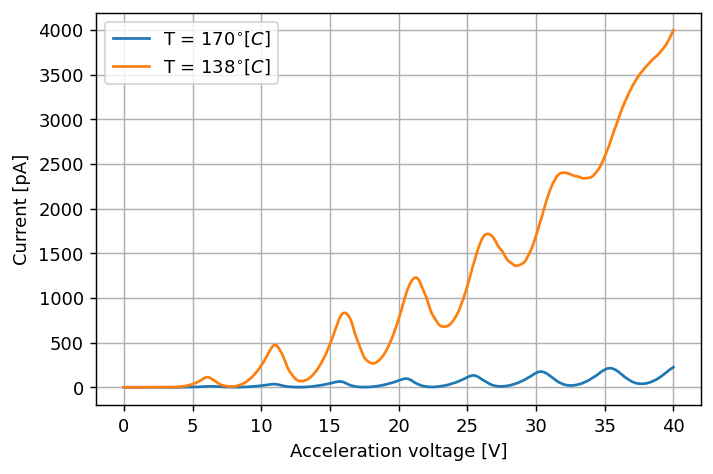

In [173]:
plt.figure(dpi=130)
fh1 = pd.read_csv(f'data/FH1_240ma_6200mv.csv',sep='\t',header=5) # read the data. 
Va1 = np.array(fh1['Va(V)_1']) # accelerating voltage array 
I1 = np.array(fh1['Ia(E-12 A)_1']) # Current array 
T1 = np.array(fh1['T(c)_1']) #temperature array 
plt.plot(Va1, I1, label=r'T = $170^{\circ} \left[ C\right]$') 
fh1 = pd.read_csv(f'data/FH_T138_Vr15_240ma_6200mv.csv',sep='\t',header=5) # read the data. 
Va1 = np.array(fh1['Va(V)_1']) # accelerating voltage array 
I1 = np.array(fh1['Ia(E-12 A)_1']) # Current array 
T1 = np.array(fh1['T(c)_1']) #temperature array 
plt.plot(Va1, I1, label=r'T = $138^{\circ} \left[ C\right]$') 
plt.ylabel('Current [pA]') 
plt.xlabel('Acceleration voltage [V]') 
plt.legend()
plt.grid() 
plt.savefig('plots/temperature.png')
plt.show()

In [154]:
fh1 = pd.read_csv('data/FH_Ion_Vr1_240ma_6200mv_final15500mv_step05_T110.csv',sep='\t',header=5) # read the data. 
Va1 = np.array(fh1['Va(V)_1']) # accelerating voltage array 
I1 = np.array(fh1['Ia(E-12 A)_1']) # Current array 
T1 = np.array(fh1['T(c)_1']) #temperature array 

reg = linregress(Va1[Va1>13], I1[Va1>13])
ion_energy = -ufloat(reg.intercept, reg.intercept_stderr)/ufloat(reg.slope, reg.stderr)
n = np.linspace(ion_energy.n, Va1[-1], 100)

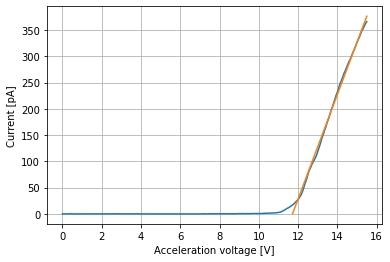

In [155]:
plt.figure() 
plt.plot(Va1, I1, label=''.format(Heater_Current)) 
plt.plot(n, reg.slope*n+reg.intercept)
plt.ylabel('Current [pA]') 
plt.xlabel('Acceleration voltage [V]') 
plt.grid() 

In [156]:
ion_energy -= delta

In [157]:
ion_energy

10.438571320876976+/-0.1835240940645047

In [140]:
fh1 = pd.read_csv('data/FH_Ion_Vr1_260ma_7200mv_final15500mv_step05_T110.csv',sep='\t',header=5) # read the data. 
Va1 = np.array(fh1['Va(V)_1']) # accelerating voltage array 
I1 = np.array(fh1['Ia(E-12 A)_1']) # Current array 
T1 = np.array(fh1['T(c)_1']) #temperature array 


reg = linregress(Va1[Va1>13], I1[Va1>13])
ion_energy = -ufloat(reg.intercept, reg.intercept_stderr)/ufloat(reg.slope, reg.stderr)
n = np.linspace(ion_energy.n, Va1[-1], 100)

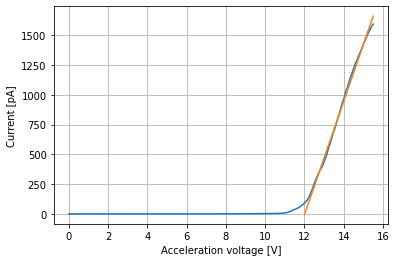

In [141]:
plt.figure() 
plt.plot(Va1, I1, label=''.format(Heater_Current)) 
plt.plot(n, reg.slope*n+reg.intercept)
plt.ylabel('Current [pA]') 
plt.xlabel('Acceleration voltage [V]') 
plt.grid() 

In [151]:
ion_energy -= delta

In [152]:
ion_energy

10.735931392657779+/-0.21962980213502278

In [150]:
hbar * c * 2*np.pi/(253.65e-9) / electron_volt

4.888003092182152

In [168]:
lmbda_ninfty = 1187.873e-10

In [169]:
2*np.pi/lmbda_ninfty*c*hbar/electron_volt

10.437496132431688